In [91]:
from scipy.spatial import distance
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from sklearn import preprocessing

In [128]:
def do_hausforfflike_sim(dist_type, list_set, X):
    d = distance.squareform(distance.pdist(X, metric=dist_type))  # e.g. 'euclidean', ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’
    #similarity between 0 e 1 (ramo d'iperbole traslato -1 sull'asse x)
    s = 1/(1+d)
    len_set=[]
    for i in list_set:
        len_set.append(len(i))
    
    HS_all = []
    cntx = 0
    for j in len_set:
        cnty = 0
        for k in len_set:
            X_red = s[cntx:j+cntx,cnty:k+cnty]
            #Num = sum(np.amax(X_red, axis =0)) + sum(np.amax(X_red, axis =1))
            Num = sum(np.median(X_red, axis =0)) + sum(np.median(X_red, axis =1))
            HS = Num/(j+k)
            HS_all.append(HS)
            cnty += k
            
        cntx += j
    HS_all = np.reshape(HS_all, (len(list_set), len(list_set)))
    
    return HS_all

In [147]:
#READ WHALES VALUES (DECILES)

my_df = pd.read_csv("./Data_and_Output/ALLWHALEScsv.csv", header=None)
list_set = [['AR_1e3g_A.pdb','AR_1z95_A.pdb','AR_2am9_A.pdb','AR_2ama_A.pdb','AR_2ax6_A.pdb','AR_2ax9_A.pdb','AR_2hvc_A.pdb','AR_2ihq_A.pdb','AR_2nw4_A.pdb','AR_2oz7_A.pdb','AR_3b5r_A.pdb','AR_3b65_A.pdb','AR_3b66_A.pdb','AR_3b67_A.pdb','AR_3b68_A.pdb','AR_3g0w_A.pdb','AR_3v49_A.pdb','AR_4ql8_A.pdb','AR_5cj6_A.pdb','AR_5t8e_A.pdb','AR_5t8j_A.pdb','AR_5v8q_A.pdb'],['ER_1err_A.pdb','ER_1err_B.pdb','ER_1g50_A.pdb','ER_1sj0_A.pdb','ER_1uom_A.pdb','ER_1xp1_A.pdb','ER_1xp6_A.pdb','ER_1xp9_A.pdb','ER_1xpc_A.pdb','ER_1xqc_A.pdb','ER_1xqc_B.pdb','ER_1xqc_C.pdb','ER_1xqc_D.pdb','ER_1zky_A.pdb','ER_1zky_B.pdb',	'ER_2ayr_A.pdb','ER_2b1v_A.pdb','ER_2b1v_B.pdb','ER_2b1z_A.pdb','ER_2b1z_B.pdb','ER_2fai_A.pdb','ER_2fai_B.pdb','ER_2p15_A.pdb','ER_2p15_B.pdb','ER_2pog_A.pdb','ER_2pog_B.pdb','ER_2q70_A.pdb','ER_2q70_B.pdb','ER_2qa8_A.pdb','ER_2qa8_B.pdb','ER_2qe4_A.pdb','ER_2qe4_B.pdb','ER_2qh6_A.pdb','ER_2qh6_B.pdb','ER_2r6w_A.pdb','ER_2r6w_B.pdb','ER_2r6y_A.pdb','ER_2r6y_B.pdb','ER_4mg5_A.pdb','ER_4mg5_B.pdb','ER_4mg6_A.pdb','ER_4mg6_B.pdb','ER_4mg7_A.pdb','ER_4mg7_B.pdb','ER_4mg8_A.pdb','ER_4mg8_B.pdb','ER_4mg9_A.pdb','ER_4mg9_B.pdb','ER_4mga_A.pdb','ER_4mga_B.pdb','ER_4mgb_A.pdb','ER_4mgb_B.pdb','ER_4mgc_A.pdb','ER_4mgc_B.pdb','ER_4mgd_A.pdb','ER_4mgd_B.pdb','ER_5ak2_A.pdb','ER_5ak2_B.pdb','ER_5fqr_A.pdb','ER_5fqs_A.pdb','ER_5t92_A.pdb','ER_5t92_B.pdb','ER_5t97_A.pdb','ER_5t97_B.pdb'],['ERA_1x7e_A.pdb','ERA_1x7e_B.pdb','ERA_1x7r_A.pdb','ERA_2i0j_A.pdb','ERA_2i0j_B.pdb','ERA_2i0j_C.pdb','ERA_2i0j_D.pdb','ERA_3erd_A.pdb','ERA_3erd_B.pdb','ERA_3ert_A.pdb','ERA_5fqp_A.pdb','ERA_5fqt_A.pdb','ERA_5fqv_A.pdb'],['ERB_1nde_A.pdb','ERB_1qkn_A.pdb','ERB_1u3q_A.pdb','ERB_1u3q_B.pdb','ERB_1u3q_C.pdb','ERB_1u3q_D.pdb','ERB_1u3r_A.pdb','ERB_1u3r_B.pdb','ERB_1u3s_A.pdb','ERB_1u3s_B.pdb','ERB_1u9e_A.pdb','ERB_1u9e_B.pdb','ERB_1x7b_A.pdb','ERB_1x7b_B.pdb','ERB_1x76_A.pdb','ERB_1x76_B.pdb','ERB_1x78_A.pdb','ERB_1x78_B.pdb','ERB_1yy4_A.pdb','ERB_1yy4_B.pdb','ERB_1yye_A.pdb','ERB_1yye_B.pdb','ERB_1zaf_B.pdb','ERB_2giu_A.pdb','ERB_2i0g_A.pdb','ERB_2i0g_B.pdb','ERB_2j7x_A.pdb','ERB_2jj3_A.pdb','ERB_2jj3_B.pdb','ERB_2nv7_A.pdb','ERB_2nv7_B.pdb','ERB_2qtu_A.pdb','ERB_2qtu_B.pdb','ERB_2z4b_A.pdb','ERB_2z4b_B.pdb'],['FXR_3dct_A.pdb','FXR_3okh_A.pdb','FXR_3oki_A.pdb','FXR_3oki_C.pdb','FXR_3olf_A.pdb','FXR_3olf_C.pdb','FXR_3omm_A.pdb','FXR_3omm_C.pdb','FXR_3oof_A.pdb','FXR_3oof_C.pdb','FXR_3ook_A.pdb','FXR_3ook_C.pdb','FXR_4oiv_A.pdb','FXR_4oiv_B.pdb','FXR_5q0i_A.pdb','FXR_5q0j_A.pdb','FXR_5q0j_C.pdb','FXR_5q0l_A.pdb','FXR_5q0l_C.pdb','FXR_5q0m_A.pdb','FXR_5q0n_A.pdb','FXR_5q0n_C.pdb','FXR_5q0o_A.pdb','FXR_5q0o_C.pdb','FXR_5q0p_A.pdb','FXR_5q0p_C.pdb','FXR_5q0q_A.pdb','FXR_5q0q_C.pdb','FXR_5q0r_A.pdb','FXR_5q0s_A.pdb','FXR_5q0s_C.pdb','FXR_5q0t_A.pdb','FXR_5q0u_A.pdb','FXR_5q0u_C.pdb','FXR_5q0v_A.pdb','FXR_5q0v_C.pdb','FXR_5q0w_A.pdb','FXR_5q0x_A.pdb','FXR_5q0y_A.pdb','FXR_5q0y_C.pdb','FXR_5q1a_A.pdb','FXR_5q1b_A.pdb','FXR_5q1b_C.pdb','FXR_5q1c_A.pdb','FXR_5q1c_C.pdb','FXR_5q1d_A.pdb','FXR_5q1d_C.pdb','FXR_5q1f_A.pdb','FXR_5q1f_C.pdb','FXR_5q1g_A.pdb','FXR_5q1i_A.pdb','FXR_5q10_A.pdb','FXR_5q11_A.pdb','FXR_5q12_A.pdb','FXR_5q13_A.pdb','FXR_5q13_C.pdb','FXR_5q14_A.pdb','FXR_5q14_C.pdb','FXR_5q15_A.pdb','FXR_5q15_C.pdb','FXR_5q16_A.pdb','FXR_5q16_C.pdb','FXR_5q17_A.pdb','FXR_5q18_A.pdb','FXR_5q18_C.pdb','FXR_5q19_A.pdb','FXR_5q19_C.pdb'],['GR_1nhz_A.pdb','GR_1p93_A.pdb','GR_1p93_B.pdb','GR_1p93_C.pdb','GR_1p93_D.pdb','GR_3k22_A.pdb','GR_3k22_B.pdb','GR_3k23_A.pdb','GR_3k23_B.pdb','GR_3k23_C.pdb','GR_4csj_A.pdb','GR_4p6w_A.pdb','GR_4p6x_A.pdb','GR_4p6x_C.pdb','GR_4p6x_E.pdb','GR_4p6x_G.pdb','GR_4p6x_I.pdb','GR_4p6x_K.pdb'],['PPARA_1i7g_A.pdb','PPARA_1kkq_A.pdb','PPARA_1kkq_B.pdb','PPARA_1kkq_C.pdb','PPARA_3fei_A.pdb','PPARA_3g8i_A.pdb','PPARA_3kdt_A.pdb','PPARA_3kdt_B.pdb','PPARA_3kdu_A.pdb','PPARA_3kdu_B.pdb'],['PPARD_3dy6_A.pdb','PPARD_3dy6_B.pdb','PPARD_3gwx_A.pdb','PPARD_3gwx_B.pdb','PPARD_3gz9_A.pdb','PPARD_3peq_A.pdb','PPARD_3peq_B.pdb','PPARD_3tkm_A.pdb'],['PPARG_1fm9_D.pdb','PPARG_1i7i_A.pdb','PPARG_1i7i_B.pdb','PPARG_1nyx_A.pdb','PPARG_1zeo_A.pdb','PPARG_2ath_A.pdb','PPARG_2ath_B.pdb','PPARG_2f4b_A.pdb','PPARG_2g0g_A.pdb','PPARG_2g0h_A.pdb','PPARG_2g0h_B.pdb','PPARG_2gtk_A.pdb','PPARG_2hfp_A.pdb','PPARG_2i4j_A.pdb','PPARG_2i4z_A.pdb','PPARG_2p4y_A.pdb','PPARG_2p4y_B.pdb','PPARG_2q8s_A.pdb','PPARG_2yfe_A.pdb','PPARG_2yfe_B.pdb','PPARG_3b1m_A.pdb','PPARG_3fej_A.pdb','PPARG_3fur_A.pdb','PPARG_3g9e_A.pdb','PPARG_3ia6_A.pdb','PPARG_3ia6_B.pdb','PPARG_3lmp_A.pdb','PPARG_3osi_A.pdb','PPARG_3osw_A.pdb','PPARG_3r5n_A.pdb','PPARG_3r8i_A.pdb','PPARG_3sz1_B.pdb','PPARG_3t03_A.pdb','PPARG_3t03_B.pdb','PPARG_3ty0_A.pdb','PPARG_3ty0_B.pdb','PPARG_3u9q_A.pdb','PPARG_4a4v_A.pdb','PPARG_4a4v_B.pdb','PPARG_4a4w_A.pdb','PPARG_4a4w_B.pdb','PPARG_4jaz_A.pdb','PPARG_4prg_A.pdb','PPARG_4prg_B.pdb','PPARG_4prg_C.pdb','PPARG_4prg_D.pdb','PPARG_4r06_A.pdb','PPARG_4xta_A.pdb','PPARG_4xta_B.pdb','PPARG_4xuh_A.pdb','PPARG_4xuh_B.pdb','PPARG_4xum_A.pdb','PPARG_4xum_B.pdb','PPARG_4y29_A.pdb','PPARG_5f9b_B.pdb','PPARG_5lsg_A.pdb','PPARG_5two_A.pdb','PPARG_5u5l_A.pdb'],['PR_1a28_A.pdb','PR_1a28_B.pdb','PR_1sqn_A.pdb','PR_1sqn_B.pdb','PR_1sr7_A.pdb','PR_1sr7_B.pdb','PR_1zuc_A.pdb','PR_1zuc_B.pdb','PR_2w8y_A.pdb','PR_3g8o_A.pdb','PR_3g8o_B.pdb','PR_3hq5_A.pdb','PR_3hq5_B.pdb','PR_3kba_A.pdb','PR_3kba_B.pdb','PR_4oar_A.pdb'],['PXR_1m13_A.pdb','PXR_2o9i_A.pdb'],['RXR_3fal_B.pdb','RXR_3nsq_B.pdb','RXR_3ozj_A.pdb','RXR_3ozj_C.pdb','RXR_3pcu_A.pdb','RXR_3r5m_C.pdb','RXR_4k4j_A.pdb','RXR_4k6i_A.pdb','RXR_4m8e_A.pdb','RXR_4m8h_A.pdb','RXR_4poh_A.pdb','RXR_4poj_A.pdb','RXR_4pp3_A.pdb','RXR_4pp5_A.pdb','RXR_4zsh_A.pdb','RXR_5mkj_A.pdb']]
lab = ["AR","ER", "ERA", "ERB", "FXR","GR","PPARA","PPARD","PPARG","PR","PXR","RXR"]
my_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-2.22,-1.38,-1.13,-0.937,-0.785,-0.621,-0.415,0.676,0.911,1.18,...,-0.017,-0.012,-0.009,-0.007,-0.005,-0.002,0.004,0.007,0.01,0.038
1,-2.23,-1.37,-1.13,-0.936,-0.800,-0.629,-0.425,0.683,0.911,1.19,...,-0.017,-0.011,-0.009,-0.007,-0.005,-0.003,0.004,0.007,0.01,0.035
2,-2.19,-1.38,-1.14,-0.934,-0.793,-0.622,-0.428,0.682,0.914,1.18,...,-0.017,-0.011,-0.009,-0.007,-0.005,-0.002,0.004,0.007,0.01,0.036
3,-2.21,-1.37,-1.12,-0.927,-0.791,-0.624,-0.427,0.675,0.916,1.17,...,-0.017,-0.011,-0.009,-0.007,-0.005,-0.003,0.004,0.007,0.01,0.036
4,-2.25,-1.37,-1.13,-0.938,-0.786,-0.613,-0.418,0.671,0.902,1.17,...,-0.017,-0.011,-0.009,-0.007,-0.005,-0.002,0.004,0.007,0.01,0.038


In [148]:
# autoscaling whales
X = preprocessing.scale(my_df.values, axis=1)

In [149]:
# Hausdorff-like similarity with euclidean distance d (similiarity = 1/(1+d), always between 0 and 1)
HS_all = do_hausforfflike_sim('euclidean', list_set, X)
HS_all = pd.DataFrame(HS_all)
HS_all

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.890458,0.763477,0.712081,0.776238,0.780682,0.830623,0.751296,0.696092,0.731380,0.856546,0.713526,0.811527
1,0.763477,0.783464,0.772620,0.780161,0.717721,0.763417,0.718366,0.756695,0.726888,0.767424,0.704590,0.748356
2,0.712081,0.772620,0.780453,0.762597,0.665482,0.708781,0.702685,0.773896,0.698316,0.715628,0.671073,0.707707
3,0.776238,0.780161,0.762597,0.790723,0.746047,0.784036,0.728467,0.732884,0.740645,0.783799,0.719239,0.758477
4,0.780682,0.717721,0.665482,0.746047,0.832815,0.811200,0.729772,0.650032,0.742907,0.801042,0.749784,0.764525
5,0.830623,0.763417,0.708781,0.784036,0.811200,0.863827,0.741840,0.679446,0.758920,0.845736,0.762817,0.780778
6,0.751296,0.718366,0.702685,0.728467,0.729772,0.741840,0.731104,0.726086,0.718031,0.744646,0.660666,0.733273
7,0.696092,0.756695,0.773896,0.732884,0.650032,0.679446,0.726086,0.856517,0.691446,0.688155,0.628695,0.703733
8,0.731380,0.726888,0.698316,0.740645,0.742907,0.758920,0.718031,0.691446,0.741069,0.744646,0.716810,0.718346
9,0.856546,0.767424,0.715628,0.783799,0.801042,0.845736,0.744646,0.688155,0.744646,0.861383,0.746164,0.796901


(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115]),
 <a list of 12 Text xticklabel objects>)

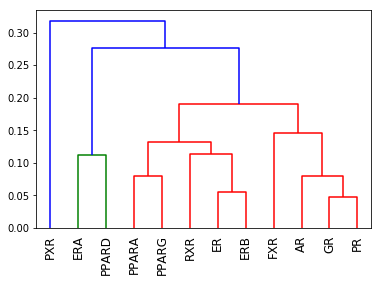

In [150]:
# plot dendrograme with hierarchical/agglomerative clustering using euclidean distance
Z = linkage(HS_all.values, 'average')  #equal to "median" and "single"
plt.figure()
dn = dendrogram(Z, labels=lab)
plt.xticks(rotation=90)

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115]),
 <a list of 12 Text xticklabel objects>)

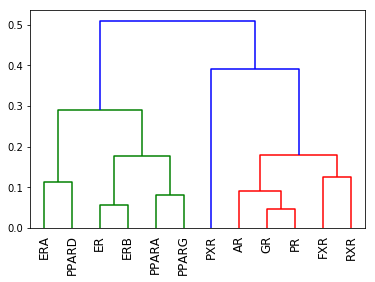

In [151]:
Z = linkage(HS_all.values, 'ward')
plt.figure()
dn = dendrogram(Z, labels=lab)
plt.xticks(rotation=90)